In [1]:
import pandas as pd

In [2]:
import glob
lista = glob.glob("*.csv")

In [3]:
lista[0][:-4]

'W001'

In [4]:
lista_df = []
for x in lista:
    df = pd.read_csv(x)
    lista_df.append(df)

In [16]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [32]:
lista_df[0].created_at.to_list()[0]

'2021-04-21 17:16:01'

In [33]:
lista_df[0].created_at.to_list()[-1]

'2021-05-10 16:24:02'

In [20]:
lista_df[1]['wereable', 'created_at']

KeyError: ('wereable', 'created_at')

In [42]:
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [35]:
merged = pd.concat(lista_df)

In [146]:
dic = {}
for x in lista_df:
    df_date = x.groupby(['created_at']).sum()[['16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26']]
    df_date_final = df_date
    df_date_final['max'] = df_date.max(axis= 1)
    df_date_final ['sum'] = df_date.sum(axis=1)
    name = x['wereable'][0]
    dic[name] = df_date_final
    

In [170]:
dic['W018']['dia'] = pd.to_datetime(dic['W018'].index)

In [186]:
dic['W018']['date'] = pd.to_datetime(dic['W018']['dia'].dt.strftime('%m/%d/%Y'))

In [188]:
dic['W018']

,16,17,18,19,20,21,22,23,24,25,26,max,sum,dia,date
created_at,,,,,,,,,,,,,,,
2021-05-21 08:42:24,4.0,5.0,3.0,0.0,5.0,4.0,6.0,2.0,0.0,3.0,4.0,6.0,42.0,2021-05-21 08:42:24,2021-05-21
2021-05-24 09:22:09,8.0,7.0,5.0,5.0,5.0,6.0,8.0,5.0,5.0,7.0,6.0,8.0,75.0,2021-05-24 09:22:09,2021-05-24
2021-05-26 09:28:30,5.0,5.0,7.0,4.0,10.0,4.0,10.0,5.0,5.0,5.0,10.0,10.0,80.0,2021-05-26 09:28:30,2021-05-26
2021-05-28 09:28:56,3.0,7.0,5.0,3.0,8.0,5.0,10.0,5.0,6.0,7.0,6.0,10.0,75.0,2021-05-28 09:28:56,2021-05-28
2021-05-31 17:31:48,5.0,8.0,8.0,1.0,2.0,7.0,10.0,4.0,4.0,9.0,5.0,10.0,73.0,2021-05-31 17:31:48,2021-05-31
2021-06-04 12:55:27,6.0,10.0,5.0,0.0,4.0,5.0,9.0,5.0,5.0,7.0,7.0,10.0,73.0,2021-06-04 12:55:27,2021-06-04
2021-06-07 15:13:07,4.0,10.0,9.0,0.0,4.0,4.0,9.0,9.0,7.0,8.0,0.0,10.0,74.0,2021-06-07 15:13:07,2021-06-07


In [153]:
import pickle


with open('dic_events.pickle', 'wb') as handle:
    pickle.dump(dic, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('dic_events.pickle', 'rb') as handle:
    b = pickle.load(handle)


In [159]:
b['W001']

,16,17,18,19,20,21,22,23,24,25,26,max,sum
created_at,,,,,,,,,,,,,
2021-04-21 17:16:01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-04-23 19:12:56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
2021-04-26 15:34:03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-04-28 15:46:52,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,5.0
2021-04-30 14:51:08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-03 16:12:50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-05 14:10:45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-07 14:41:45,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
2021-05-10 16:24:02,2.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,3.0,11.0


In [139]:
lista_fechas[5]

,16,17,18,19,20,21,22,23,24,25,26,max,sum
created_at,,,,,,,,,,,,,
2021-05-14 08:26:19,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0
2021-05-14 08:26:55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-17 14:11:30,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,0.0,3.0,29.0
2021-05-17 14:12:55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-19 14:05:03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-19 14:06:44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-21 14:26:01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-21 14:29:45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-21 14:30:44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
dic

{'0     W001\n1     W001\n2     W001\n3     W001\n4     W001\n5     W001\n6     W001\n7     W001\n8     W001\n9     W001\n10    W001\n11    W001\n12    W001\n13    W001\n14    W001\n15    W001\n16    W001\n17    W001\n18    W001\n19    W001\n20    W001\n21    W001\n22    W001\n23    W001\n24    W001\n25    W001\n26    W001\n27    W001\n28    W001\n29    W001\n30    W001\n31    W001\n32    W001\n33    W001\n34    W001\n35    W001\n36    W001\n37    W001\n38    W001\n39    W001\n40    W001\n41    W001\n42    W001\n43    W001\n44    W001\n45    W001\n46    W001\n47    W001\n48    W001\n49    W001\n50    W001\n51    W001\n52    W001\n53    W001\n54    W001\n55    W001\n56    W001\n57    W001\n58    W001\n59    W001\n60    W001\n61    W001\n62    W001\n63    W001\n64    W001\n65    W001\n66    W001\n67    W001\n68    W001\n69    W001\n70    W001\n71    W001\n72    W001\n73    W001\n74    W001\n75    W001\n76    W001\n77    W001\n78    W001\n79    W001\n80    W001\n81    W001\n82    W001\n83

In [101]:
df_date = lista_df[0].groupby(['created_at']).sum()[['16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26']]

In [102]:
df_date

,16,17,18,19,20,21,22,23,24,25,26
created_at,,,,,,,,,,,
2021-04-21 17:16:01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-04-23 19:12:56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2021-04-26 15:34:03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-04-28 15:46:52,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2021-04-30 14:51:08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-03 16:12:50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-05 14:10:45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-07 14:41:45,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2021-05-10 16:24:02,2.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0


In [109]:
df_date_final = df_date

df_date_final['max'] = df_date.max(axis= 1)

df_date_final ['sum'] = df_date.sum(axis=1)

In [112]:
df_date_final

,16,17,18,19,20,21,22,23,24,25,26,max,sum
created_at,,,,,,,,,,,,,
2021-04-21 17:16:01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-04-23 19:12:56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0
2021-04-26 15:34:03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-04-28 15:46:52,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,13.0
2021-04-30 14:51:08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-03 16:12:50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-05 14:10:45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-07 14:41:45,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0
2021-05-10 16:24:02,2.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,11.0,30.0


In [35]:
merged.wereable.value_counts()

W014    209
W001     99
W016     99
W013     99
W018     77
W007     66
W011     66
W010     44
W017     33
Name: wereable, dtype: int64

In [46]:
lista_df[7].head(10)

,Unnamed: 0,Unnamed: 0.1,id,questionnaire_id,user_id,question_id,answer_text,question_option_id,created_at,updated_at,...,18,19,20,21,22,23,24,25,26,wereable
0,396,396,2163,2,125,16,NaN,27,2021-05-21 07:38:05,2021-05-21 07:38:05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W013
1,398,398,2165,2,125,18,NaN,29,2021-05-21 07:38:05,2021-05-21 07:38:05,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W013
2,399,399,2166,2,125,19,NaN,11,2021-05-21 07:38:05,2021-05-21 07:38:05,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W013
3,400,400,2167,2,125,20,NaN,27,2021-05-21 07:38:05,2021-05-21 07:38:05,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,W013
4,401,401,2168,2,125,21,NaN,30,2021-05-21 07:38:05,2021-05-21 07:38:05,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,W013
5,402,402,2169,2,125,22,NaN,28,2021-05-21 07:38:05,2021-05-21 07:38:05,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,W013
6,403,403,2170,2,125,23,NaN,27,2021-05-21 07:38:05,2021-05-21 07:38:05,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,W013
7,404,404,2171,2,125,24,NaN,31,2021-05-21 07:38:05,2021-05-21 07:38:05,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,W013
8,405,405,2172,2,125,25,NaN,29,2021-05-21 07:38:05,2021-05-21 07:38:05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,W013
9,406,406,2173,2,125,26,NaN,25,2021-05-21 07:38:05,2021-05-21 07:38:05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,W013


In [356]:
lista

['W001.csv',
 'W018.csv',
 'W010.csv',
 'W007.csv',
 'W011.csv',
 'W014.csv',
 'W016.csv',
 'W013.csv',
 'W017.csv']

In [357]:
busqueda = lista_df[0]

In [10]:
lista_shape = []
for x in lista_df:
    busqueda = x
    r = busqueda[busqueda.question_id == 20][['updated_at', '20']].shape[0]
    lista_shape.append(r)

In [12]:
d = dict (zip (lista, lista_shape))

In [14]:
d

{'W001.csv': 9,
 'W018.csv': 7,
 'W010.csv': 4,
 'W007.csv': 6,
 'W011.csv': 6,
 'W014.csv': 10,
 'W016.csv': 9,
 'W013.csv': 9,
 'W017.csv': 3}

In [18]:
g = pd.DataFrame.from_dict(d, orient='index')

In [27]:
g.columns = ['qa_symptoms']

In [28]:
g

,qa_symptoms
W001.csv,9
W018.csv,7
W010.csv,4
W007.csv,6
W011.csv,6
W014.csv,10
W016.csv,9
W013.csv,9
W017.csv,3


In [424]:
lista_df[3][lista_df[3].question_id == 17][['updated_at', '16']]

,updated_at,16
1,2021-03-15 09:30:07,NaN
19,2021-03-17 07:37:53,NaN
23,2021-03-19 08:27:58,NaN
34,2021-03-22 09:27:43,NaN
54,2021-03-24 10:20:36,NaN
64,2021-03-26 11:25:18,NaN


In [ ]:
WOO1--> completar con 0.0 la pregunta 16 (por delante)
W010--> completar todo con 0 la 16
WO17--> completar todo con O la 16
W014--> limitar todo a 0 la 16




In [643]:
lista = lista_df[1].question_id.value_counts().index.to_list()

In [644]:
lista

[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]

In [645]:
final = []
for m in lista_df:
    dic = {}
    for x in lista:
        p = m[m.question_id == x][[str(x)]]
        dic[x] = p[str(x)].to_list()
    final.append(dic)

In [646]:
len(final)

9

In [370]:
dict_arrays = dict (zip (lista, final))

In [393]:
dict_arrays['W007.csv'][26]

[6.0, nan, 0.0, nan, 0.0, 1.0, 1.0, 0.0, 0.0, 2.0, nan, 0.0]

In [394]:
dict_arrays

{'W001.csv': {16: [0.0, 0.0, 2.0],
  17: [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  18: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  19: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  20: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  21: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 3.0],
  22: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  23: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0],
  24: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  25: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  26: [0.0,
   nan,
   1.0,
   0.0,
   0.0,
   nan,
   0.0,
   2.0,
   0.0,
   nan,
   0.0,
   nan,
   0.0,
   0.0,
   0.0]},
 'W018.csv': {16: [4.0, 8.0, 5.0, 3.0, 5.0, 6.0, 4.0],
  17: [5.0, 7.0, 5.0, 7.0, 8.0, 10.0, 10.0],
  18: [3.0, 5.0, 7.0, 5.0, 8.0, 5.0, 9.0],
  19: [0.0, 5.0, 4.0, 3.0, 1.0, 0.0, 0.0],
  20: [5.0, 5.0, 10.0, 8.0, 2.0, 4.0, 4.0],
  21: [4.0, 6.0, 4.0, 5.0, 7.0, 5.0, 4.0],
  22: [6.0, 8.0, 10.0, 10.0, 10.0, 9.0, 9.0],
  23: [2.0, 5.0, 5.0, 5.0, 4.0, 5.0, 9.0],


In [527]:
import pickle

with open('arrays_question_assunsions.pickle', 'wb') as handle:
    pickle.dump(b, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('arrays_question_assunsions.pickle', 'rb') as handle:
    c = pickle.load(handle)


In [2]:
import pickle
with open('arrays_question_assunsions.pickle', 'rb') as handle:
    c = pickle.load(handle)

In [3]:
with open('arrays_question.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [8]:
import json
json_object = json.dumps(b, indent = 4)  


In [14]:
import json
with open('data_qa_2.json', 'w', encoding='utf8') as f:
    json.dump(b, f, indent = 4)

In [15]:
with open('data_qa_2.json') as json_file:
    data = json.load(json_file)

In [16]:
data

{'W001.csv': {'16': [0.0, 0.0, 2.0],
  '17': [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  '18': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  '19': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  '20': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  '21': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 3.0],
  '22': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  '23': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0],
  '24': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  '25': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  '26': [0.0,
   nan,
   1.0,
   0.0,
   0.0,
   nan,
   0.0,
   2.0,
   0.0,
   nan,
   0.0,
   nan,
   0.0,
   0.0,
   0.0]},
 'W018.csv': {'16': [4.0, 8.0, 5.0, 3.0, 5.0, 6.0, 4.0],
  '17': [5.0, 7.0, 5.0, 7.0, 8.0, 10.0, 10.0],
  '18': [3.0, 5.0, 7.0, 5.0, 8.0, 5.0, 9.0],
  '19': [0.0, 5.0, 4.0, 3.0, 1.0, 0.0, 0.0],
  '20': [5.0, 5.0, 10.0, 8.0, 2.0, 4.0, 4.0],
  '21': [4.0, 6.0, 4.0, 5.0, 7.0, 5.0, 4.0],
  '22': [6.0, 8.0, 10.0, 10.0, 10.0, 9.0, 9.0],
  '23':

In [466]:
WOO1--> completar con 0.0 la pregunta 16 (por delante)
W010--> completar todo con 0 la 16
WO07--> completar todo con O la 16
W014--> limitar todo a 0 la 16

SyntaxError: invalid syntax (<ipython-input-466-718fc0832bfe>, line 1)

In [492]:
b['W014.csv'][16] = list(np.zeros(10))

In [500]:
b['W014.csv'][24] = b['W014.csv'][24][:-1]

In [501]:
b['W014.csv']

{16: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 17: [2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 18: [1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 19: [3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 20: [3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 21: [3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 22: [3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 23: [3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 24: [1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 25: [3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 26: []}

In [506]:
for k, v in b.items():
    del v[26]

In [526]:
b

{'W001.csv': {16: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0],
  17: [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  18: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  19: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  20: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  21: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 3.0],
  22: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  23: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0],
  24: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  25: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]},
 'W018.csv': {16: [4.0, 8.0, 5.0, 3.0, 5.0, 6.0, 4.0],
  17: [5.0, 7.0, 5.0, 7.0, 8.0, 10.0, 10.0],
  18: [3.0, 5.0, 7.0, 5.0, 8.0, 5.0, 9.0],
  19: [0.0, 5.0, 4.0, 3.0, 1.0, 0.0, 0.0],
  20: [5.0, 5.0, 10.0, 8.0, 2.0, 4.0, 4.0],
  21: [4.0, 6.0, 4.0, 5.0, 7.0, 5.0, 4.0],
  22: [6.0, 8.0, 10.0, 10.0, 10.0, 9.0, 9.0],
  23: [2.0, 5.0, 5.0, 5.0, 4.0, 5.0, 9.0],
  24: [0.0, 5.0, 5.0, 6.0, 4.0, 5.0, 7.0],
  25: [3.0, 7.0, 5.0, 7.0, 9.0, 7.0, 8.0]},
 'W010.c

In [529]:
lista

['W001.csv',
 'W018.csv',
 'W010.csv',
 'W007.csv',
 'W011.csv',
 'W014.csv',
 'W016.csv',
 'W013.csv',
 'W017.csv']

In [536]:
dic_arrays = {} 
for x in lista:
    a = list (pd.DataFrame.from_dict(b[x]).values.flatten())
    dic_arrays[x] = a

In [540]:
largo = []
for k, v in dic_arrays.items():
    largo.append (len(v))

In [581]:
len (dic_arrays['W001.csv'])

90

In [582]:
100-len (dic_arrays['W001.csv'])

10

In [631]:
max = 110

dic_padding = {}
for k, v in dic_arrays.items():
    if len (v) < max:
        largo = len(v)
        print (largo)
        n_pad = max - largo
        print (n_pad)
        gas=np.empty(n_pad); gas.fill(-1)
        f = np.append(np.array(v), gas)
        dic_padding[k] = f
        
        
        
    

90
20
70
40
40
70
60
50
60
50
100
10
90
20
90
20
30
80


In [633]:
dic_padding

{'W001.csv': array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  2.,  0.,  0.,  0.,  0.,  3.,  0.,  3.,  0.,  0., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.]),
 'W018.csv': array([ 4.,  5.,  3.,  0.,  5.,  4.,  6.,  2.,  0.,  3.,  8.,  7.,  5.,
         5.,  5.,  6.,  8.,  5.,  5.,  7.,  5.,  5.,  7.,  4., 10.,  4.,
        10.,  5.,  5.,  5.,  3.,  7.,  5.,  3.,  8.,  5., 10.,  5.,  6.,
         7.,  5.,  8.,  8.,  1.,  2.,  7., 10.,  4.,  4.,  9.,  6., 10.,
         5.,  0.,  4.,  5.,  9.,  5.,  5.,  7.,  4., 10.,  9

In [606]:
lista_padding[6]

array([0.0e+000, 1.0e+000, 0.0e+000, 0.0e+000, 1.0e+000, 0.0e+000,
       0.0e+000, 0.0e+000, 1.0e+000, 0.0e+000, 0.0e+000, 1.0e+000,
       0.0e+000, 0.0e+000, 0.0e+000, 0.0e+000, 0.0e+000, 0.0e+000,
       1.0e+000, 0.0e+000, 0.0e+000, 1.0e+000, 0.0e+000, 0.0e+000,
       1.0e+000, 0.0e+000, 1.0e+000, 0.0e+000, 0.0e+000, 0.0e+000,
       0.0e+000, 1.0e+000, 0.0e+000, 0.0e+000, 1.0e+000, 0.0e+000,
       1.0e+000, 0.0e+000, 0.0e+000, 0.0e+000, 0.0e+000, 1.0e+000,
       0.0e+000, 0.0e+000, 1.0e+000, 0.0e+000, 0.0e+000, 1.0e+000,
       0.0e+000, 0.0e+000, 1.0e+000, 1.0e+000, 1.0e+000, 0.0e+000,
       1.0e+000, 0.0e+000, 0.0e+000, 0.0e+000, 1.0e+000, 0.0e+000,
       0.0e+000, 0.0e+000, 0.0e+000, 0.0e+000, 1.0e+000, 0.0e+000,
       0.0e+000, 0.0e+000, 0.0e+000, 0.0e+000, 0.0e+000, 1.0e+000,
       1.0e+000, 0.0e+000, 1.0e+000, 0.0e+000, 0.0e+000, 0.0e+000,
       1.0e+000, 0.0e+000, 0.0e+000, 2.0e+000, 2.0e+000, 0.0e+000,
       0.0e+000, 0.0e+000, 0.0e+000, 0.0e+000, 0.0e+000, 0.0e+

In [634]:
dic_padding

{'W001.csv': array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  2.,  0.,  0.,  0.,  0.,  3.,  0.,  3.,  0.,  0., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.]),
 'W018.csv': array([ 4.,  5.,  3.,  0.,  5.,  4.,  6.,  2.,  0.,  3.,  8.,  7.,  5.,
         5.,  5.,  6.,  8.,  5.,  5.,  7.,  5.,  5.,  7.,  4., 10.,  4.,
        10.,  5.,  5.,  5.,  3.,  7.,  5.,  3.,  8.,  5., 10.,  5.,  6.,
         7.,  5.,  8.,  8.,  1.,  2.,  7., 10.,  4.,  4.,  9.,  6., 10.,
         5.,  0.,  4.,  5.,  9.,  5.,  5.,  7.,  4., 10.,  9

In [635]:
import pickle

with open('dic_padding.pickle', 'wb') as handle:
    pickle.dump(dic_padding, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('dic_padding.pickle', 'rb') as handle:
    d = pickle.load(handle)

In [636]:
d

{'W001.csv': array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  2.,  0.,  0.,  0.,  0.,  3.,  0.,  3.,  0.,  0., -1.,
        -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1., -1.]),
 'W018.csv': array([ 4.,  5.,  3.,  0.,  5.,  4.,  6.,  2.,  0.,  3.,  8.,  7.,  5.,
         5.,  5.,  6.,  8.,  5.,  5.,  7.,  5.,  5.,  7.,  4., 10.,  4.,
        10.,  5.,  5.,  5.,  3.,  7.,  5.,  3.,  8.,  5., 10.,  5.,  6.,
         7.,  5.,  8.,  8.,  1.,  2.,  7., 10.,  4.,  4.,  9.,  6., 10.,
         5.,  0.,  4.,  5.,  9.,  5.,  5.,  7.,  4., 10.,  9

In [556]:
len (dic_arrays ['W001.csv'])

90

In [352]:
 pd.DataFrame.from_dict(final[6])

,16,17,18,19,20,21,22,23,24,25,26
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [339]:
 pd.DataFrame.from_dict(final[8]).values.flatten()

array([6., 6., 5., 0., 6., 0., 3., 6., 6., 5., 4., 6., 6., 6., 0., 6., 0.,
       5., 5., 5., 6., 9., 7., 6., 4., 0., 4., 0., 7., 0., 5., 6., 8.])

In [320]:
lista[8]

'W017.csv'

In [268]:
 pd.DataFrame.from_dict(final[8]).shape

(3, 11)

In [ ]:
1, 4, 6, 7, 8

In [167]:
df_time = pd.DataFrame.from_dict(dic)

In [170]:
df_time.shape

(7, 11)

In [147]:
df_time['sum'] = df_time.sum(axis=1)

In [158]:
f = df_time.values

In [159]:
f

array([[ 4.,  5.,  3.,  0.,  5.,  4.,  6.,  2.,  0.,  3.,  4., 36.],
       [ 8.,  7.,  5.,  5.,  5.,  6.,  8.,  5.,  5.,  7.,  6., 67.],
       [ 5.,  5.,  7.,  4., 10.,  4., 10.,  5.,  5.,  5., 10., 70.],
       [ 3.,  7.,  5.,  3.,  8.,  5., 10.,  5.,  6.,  7.,  6., 65.],
       [ 5.,  8.,  8.,  1.,  2.,  7., 10.,  4.,  4.,  9.,  5., 63.],
       [ 6., 10.,  5.,  0.,  4.,  5.,  9.,  5.,  5.,  7.,  7., 63.],
       [ 4., 10.,  9.,  0.,  4.,  4.,  9.,  9.,  7.,  8.,  0., 64.]])

In [161]:
import numpy as np
g = f.flatten()

In [166]:
g

array([ 4.,  5.,  3.,  0.,  5.,  4.,  6.,  2.,  0.,  3.,  4., 36.,  8.,
        7.,  5.,  5.,  5.,  6.,  8.,  5.,  5.,  7.,  6., 67.,  5.,  5.,
        7.,  4., 10.,  4., 10.,  5.,  5.,  5., 10., 70.,  3.,  7.,  5.,
        3.,  8.,  5., 10.,  5.,  6.,  7.,  6., 65.,  5.,  8.,  8.,  1.,
        2.,  7., 10.,  4.,  4.,  9.,  5., 63.,  6., 10.,  5.,  0.,  4.,
        5.,  9.,  5.,  5.,  7.,  7., 63.,  4., 10.,  9.,  0.,  4.,  4.,
        9.,  9.,  7.,  8.,  0., 64.])

In [165]:
f

array([[ 4.,  5.,  3.,  0.,  5.,  4.,  6.,  2.,  0.,  3.,  4., 36.],
       [ 8.,  7.,  5.,  5.,  5.,  6.,  8.,  5.,  5.,  7.,  6., 67.],
       [ 5.,  5.,  7.,  4., 10.,  4., 10.,  5.,  5.,  5., 10., 70.],
       [ 3.,  7.,  5.,  3.,  8.,  5., 10.,  5.,  6.,  7.,  6., 65.],
       [ 5.,  8.,  8.,  1.,  2.,  7., 10.,  4.,  4.,  9.,  5., 63.],
       [ 6., 10.,  5.,  0.,  4.,  5.,  9.,  5.,  5.,  7.,  7., 63.],
       [ 4., 10.,  9.,  0.,  4.,  4.,  9.,  9.,  7.,  8.,  0., 64.]])

In [642]:
lista_df[0]

,Unnamed: 0,Unnamed: 0.1,id,questionnaire_id,user_id,question_id,answer_text,question_option_id,created_at,updated_at,16,17,18,19,20,21,22,23,24,25,26,wereable
0,131,131,1439,2,113,26,NaN,25,2021-04-21 17:16:01,2021-04-21 17:16:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,W001
1,129,129,1437,2,113,24,NaN,21,2021-04-21 17:16:01,2021-04-21 17:16:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,W001
2,128,128,1436,2,113,23,NaN,19,2021-04-21 17:16:01,2021-04-21 17:16:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,W001
3,127,127,1435,2,113,22,NaN,17,2021-04-21 17:16:01,2021-04-21 17:16:01,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,W001
4,126,126,1434,2,113,21,NaN,15,2021-04-21 17:16:01,2021-04-21 17:16:01,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,W001
5,125,125,1433,2,113,20,NaN,13,2021-04-21 17:16:01,2021-04-21 17:16:01,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,W001
6,124,124,1432,2,113,19,NaN,11,2021-04-21 17:16:01,2021-04-21 17:16:01,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W001
7,123,123,1431,2,113,18,NaN,9,2021-04-21 17:16:01,2021-04-21 17:16:01,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W001
8,122,122,1430,2,113,17,NaN,7,2021-04-21 17:16:01,2021-04-21 17:16:01,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W001
9,121,121,1429,2,113,26,NaN,5,2021-04-21 17:16:01,2021-04-21 17:16:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,W001


In [656]:
lista

[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]

In [666]:
with open('dic_padding.pickle', 'rb') as handle:
    d = pickle.load(handle)

In [662]:
 pd.DataFrame.from_dict(final[1])

,16,17,18,19,20,21,22,23,24,25,26
0,4.0,5.0,3.0,0.0,5.0,4.0,6.0,2.0,0.0,3.0,4.0
1,8.0,7.0,5.0,5.0,5.0,6.0,8.0,5.0,5.0,7.0,6.0
2,5.0,5.0,7.0,4.0,10.0,4.0,10.0,5.0,5.0,5.0,10.0
3,3.0,7.0,5.0,3.0,8.0,5.0,10.0,5.0,6.0,7.0,6.0
4,5.0,8.0,8.0,1.0,2.0,7.0,10.0,4.0,4.0,9.0,5.0
5,6.0,10.0,5.0,0.0,4.0,5.0,9.0,5.0,5.0,7.0,7.0
6,4.0,10.0,9.0,0.0,4.0,4.0,9.0,9.0,7.0,8.0,0.0


In [676]:
with open('arrays_question_assunsions.pickle', 'rb') as handle:
    c = pickle.load(handle)

In [741]:
dic = {}
for x in c:
    if len (pd.DataFrame.from_dict(c[x]).max(axis=1).to_list())>4:
        dic[x] = pd.DataFrame.from_dict(c[x]).max(axis=1).to_list()[:6]

In [699]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 285 kB 997 kB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [700]:
import seaborn as sns

In [742]:
df = pd.DataFrame(dic)

In [743]:
df

,W001.csv,W018.csv,W007.csv,W011.csv,W014.csv,W016.csv,W013.csv
0,0.0,6.0,6.0,7.0,3.0,1.0,5.0
1,0.0,8.0,2.0,8.0,2.0,1.0,5.0
2,0.0,10.0,3.0,8.0,0.0,1.0,4.0
3,1.0,10.0,4.0,6.0,0.0,1.0,4.0
4,0.0,10.0,3.0,7.0,0.0,1.0,4.0
5,0.0,10.0,4.0,7.0,0.0,1.0,4.0


In [744]:
pip install -U pip

distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/include/python3.8/UNKNOWN
sysconfig: /usr/include/python3.8/UNKNOWN
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [745]:
pip install -U matplotlib

distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/include/python3.8/UNKNOWN
sysconfig: /usr/include/python3.8/UNKNOWN
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [746]:
import matplotlib.pyplot as plt

In [747]:
df

,W001.csv,W018.csv,W007.csv,W011.csv,W014.csv,W016.csv,W013.csv
0,0.0,6.0,6.0,7.0,3.0,1.0,5.0
1,0.0,8.0,2.0,8.0,2.0,1.0,5.0
2,0.0,10.0,3.0,8.0,0.0,1.0,4.0
3,1.0,10.0,4.0,6.0,0.0,1.0,4.0
4,0.0,10.0,3.0,7.0,0.0,1.0,4.0
5,0.0,10.0,4.0,7.0,0.0,1.0,4.0


Text(0.5, 0, 'time')

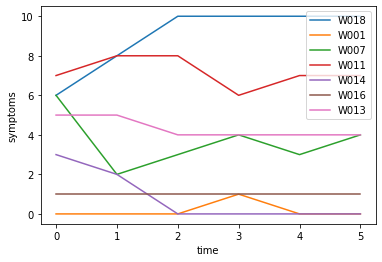

In [748]:


sns.lineplot(x = df.index, y = "W018.csv", data = df, label='W018')
sns.lineplot(x = df.index, y = "W001.csv", data = df, label='W001')
sns.lineplot(x = df.index, y = "W007.csv", data = df, label='W007')
sns.lineplot(x = df.index, y = "W011.csv", data = df, label='W011')
sns.lineplot(x = df.index, y = "W014.csv", data = df, label='W014')
sns.lineplot(x = df.index, y = "W016.csv", data = df, label='W016')
sns.lineplot(x = df.index, y = "W013.csv", data = df, label='W013')

plt.ylabel("symptoms")
plt.xlabel("time")

In [728]:
dic = {}
for x in c:
    if len (pd.DataFrame.from_dict(c[x]).sum(axis=1).to_list())>4:
        dic[x] = pd.DataFrame.from_dict(c[x]).sum(axis=1).to_list()[:6]

In [729]:
df = pd.DataFrame(dic)

In [730]:
df

,W001.csv,W018.csv,W007.csv,W011.csv,W014.csv,W016.csv,W013.csv
0,0.0,32.0,22.0,38.0,22.0,3.0,21.0
1,0.0,61.0,10.0,47.0,4.0,2.0,26.0
2,0.0,60.0,14.0,45.0,0.0,3.0,15.0
3,1.0,59.0,13.0,33.0,0.0,3.0,19.0
4,0.0,58.0,16.0,37.0,0.0,3.0,19.0
5,0.0,56.0,20.0,22.0,0.0,5.0,18.0


Text(0.5, 0, 'time')

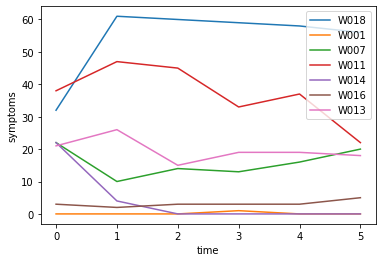

In [740]:

sns.lineplot(x = df.index, y = "W018.csv", data = df, label='W018')
sns.lineplot(x = df.index, y = "W001.csv", data = df, label='W001')
sns.lineplot(x = df.index, y = "W007.csv", data = df, label='W007')
sns.lineplot(x = df.index, y = "W011.csv", data = df, label='W011')
sns.lineplot(x = df.index, y = "W014.csv", data = df, label='W014')
sns.lineplot(x = df.index, y = "W016.csv", data = df, label='W016')
sns.lineplot(x = df.index, y = "W013.csv", data = df, label='W013')

plt.ylabel("symptoms")
plt.xlabel("time")
